In [133]:
import torch



In [134]:
import matplotlib.pyplot as plt
import seaborn
seaborn.set(style='ticks')

In [135]:
n=10

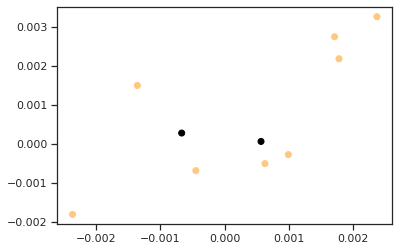

In [136]:
path='./AggData/train_noiid_cifar'
attack='backdoor_2'
rounds=0
path_to_data=f'{path}/{attack}/FedAvg_{rounds}.pt'
label=torch.load(f'{path}/{attack}/label.pt')
data=torch.load(path_to_data)
# data_=data['conv1.weight'].unsqueeze(0)
import utils
paramfloat=utils.getFloatSubModules(data)
# data_=data['layer1.0.conv1.weight'].unsqueeze(0)
# params=[param for param in paramfloat if 'conv' in param]
# params=['layer1.0.bn1.running_var']
params=paramfloat
data_=torch.cat(list(map(lambda x: data[x],params))).unsqueeze(0)[:,:100000,:]
X=data_.permute([0,2,1]).view(10,-1).cpu().detach().numpy()
x=torch.Tensor(X).permute([1,0]).view(1,-1,n)
y=label
# plot first 2 dimensions
plt.scatter(X[:,0],X[:,1],c=y,cmap='copper')

In [137]:
f'{path}/{attack}/label.pt'

'./AggData/train_noiid_cifar/backdoor_2/label.pt'

In [138]:
# torch.pca_lowrank(component) ##only works after torch1.6

In [141]:
from sklearn.decomposition import PCA

def getPCA(component, n_components):
    pca = PCA(n_components=n_components)
    pca.fit(component.permute(1,0))
    projection=pca.transform(component.permute(1,0))
    out= torch.Tensor(projection.T)
    return out,pca

In [143]:
res=getPCA(component, 2)
X_=res[0].permute(1,0)

In [184]:
norm_y

tensor([[0.1250],
        [0.1250],
        [0.1250],
        [0.0000],
        [0.1250],
        [0.1250],
        [0.1250],
        [0.1250],
        [0.0000],
        [0.1250]])

In [183]:
norm_y=torch.nn.functional.normalize(y.unsqueeze(-1),p=1,dim=0)
norm_y.permute(1,0).matmul(X_)

tensor([[-0.0193, -0.0006]])

In [186]:
res[1].transform(norm_y.permute(1,0).matmul(component.permute(1,0)))

array([[-0.01929317, -0.00061701]])

In [148]:
X_.shape

torch.Size([10, 2])

bn1.weight torch.Size([64, 10])


(-0.03454196928068995,
 0.09005712633952496,
 -0.05435667205601932,
 0.05627617631107565)

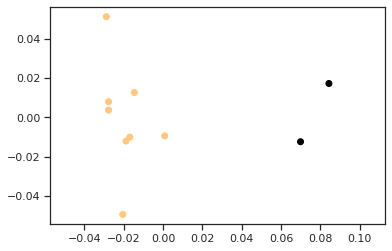

In [57]:
i=1
c_name,component= params[i],data[params[i]].cpu()
print(c_name,component.shape)
X_=getPCA(component, 2).permute(1,0)
plt.scatter(X_[:,0],X_[:,1],c=y,cmap='copper')
plt.axis('equal')

In [30]:
X_.shape

(10, 2)

In [31]:
y.shape

torch.Size([10])

In [59]:
from utils import getFloatSubModules

In [64]:
import copy
def applyToEachSubmodule(Delta,f)->(dict):
    '''
    apply function `f` to each submodules of `Delta`
    '''
    param_float=getFloatSubModules(Delta)

    result=dict(((k,f(Delta[k])) for k in param_float))
    out=copy.deepcopy(Delta)
    out.update(result)
    
    return out

In [75]:
def net2vec(net)-> (torch.Tensor):
    '''
    convert state dict to a 1 dimension Tensor
    
    Delta : torch module state dict
    
    return
    vec : torch vector with shape([d]), d is the number of Float elements in `Delta`
    '''
    param_float=getFloatSubModules(net)

    components=[]
    for param in param_float:
        components.append(net[param])        
    vec=torch.cat([component for component in components ])
    return vec

In [76]:
proj=applyToEachSubmodule(data,lambda x: getPCA(x.cpu(),6))
proj_vec=net2vec(proj)

In [109]:
?torch.save

In [122]:
sub=path_to_data.split("/")
sub[-1]="pca_"+sub[-1]
"/".join(sub)

'./AggData/train_noiid_cifar/backdoor_2/pca_FedAvg_0.pt'

In [120]:
sub

['.', 'AggData', 'train_noiid_cifar', 'backdoor_2', 'pca', 'FedAvg_0.pt']

In [132]:
param_float=getFloatSubModules(data)


(-0.019103025086224076,
 0.03734740708023309,
 -0.14818211272358894,
 0.19549879804253573)

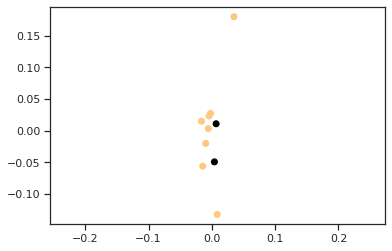

In [106]:
X_=proj_vec.T
rand_index=torch.randint(proj_vec.shape[0],(2,)).numpy()
plt.scatter(X_[:,rand_index[0]],X_[:,rand_index[1]],c=y,cmap='copper')
plt.axis('equal')